In [1]:
# import Agros Suite
from agrossuite import agros
from agrossuite.vtk_tools import view_geometry, view_scalar

import matplotlib.pylab as pl

In [2]:
# problem
problem = agros.problem(clear = True)
problem.coordinate_type = "axisymmetric"
problem.mesh_type = "triangle"

# parameters
problem.parameters["I"] = 10
problem.parameters["a"] = 0.002
problem.parameters["h"] = 0.01
problem.parameters["w"] = 0.005

# fields
# magnetic
magnetic = problem.field("magnetic")
magnetic.analysis_type = "steadystate"
magnetic.matrix_solver = "external_plugin"
magnetic.number_of_refinements = 1
magnetic.polynomial_order = 2
magnetic.adaptivity_type = "disabled"
magnetic.solver = "linear"

# boundaries
magnetic.add_boundary("A = 0", "magnetic_potential", {"magnetic_potential_real" : 0})

# materials
magnetic.add_material("Coil", {"magnetic_conductivity" : 0, "magnetic_current_density_external_real" : "I/(w*h)", "magnetic_permeability" : 1, "magnetic_remanence" : 0, "magnetic_remanence_angle" : 0, "magnetic_velocity_angular" : 0, "magnetic_velocity_x" : 0, "magnetic_velocity_y" : 0})
magnetic.add_material("Air", {"magnetic_conductivity" : 0, "magnetic_current_density_external_real" : 0, "magnetic_permeability" : 1, "magnetic_remanence" : 0, "magnetic_remanence_angle" : 0, "magnetic_velocity_angular" : 0, "magnetic_velocity_x" : 0, "magnetic_velocity_y" : 0})
magnetic.add_material("Iron", {"magnetic_conductivity" : 0, "magnetic_current_density_external_real" : 0, "magnetic_permeability" : 500, "magnetic_remanence" : 0, "magnetic_remanence_angle" : 0, "magnetic_velocity_angular" : 0, "magnetic_velocity_x" : 0, "magnetic_velocity_y" : 0})

# geometry
geometry = problem.geometry()
geometry.add_edge(0, 0.025, 0, -0.003, boundaries = {"magnetic" : "A = 0"})
geometry.add_edge(0, 0.025, 0.03, 0.025, boundaries = {"magnetic" : "A = 0"})
geometry.add_edge(0.03, 0.025, 0.03, -0.025, boundaries = {"magnetic" : "A = 0"})
geometry.add_edge(0.03, -0.025, 0, -0.025, boundaries = {"magnetic" : "A = 0"})
geometry.add_edge(0.001, -0.01, 0, -0.01)
geometry.add_edge(0, -0.003, 0, -0.01, boundaries = {"magnetic" : "A = 0"})
geometry.add_edge(0, -0.003, 0.001, -0.003)
geometry.add_edge(0.001, -0.003, 0.001, -0.01)
geometry.add_edge("a", "-h/2", "a+w", "-h/2")
geometry.add_edge("a+w", "h/2", "a+w", "-h/2")
geometry.add_edge("a", "h/2", "a", "-h/2")
geometry.add_edge("a", "h/2", "a+w", "h/2")
geometry.add_edge(0, -0.01, 0, -0.025, boundaries = {"magnetic" : "A = 0"})

geometry.add_label("a+w/2", 0, materials = {"magnetic" : "Coil"})
geometry.add_label(0.0225658, 0.00334431, materials = {"magnetic" : "Air"})
geometry.add_label(0.000593115, -0.00823363, materials = {"magnetic" : "Iron"})

2

In [3]:
# recipes 
magnetic.add_recipe_volume_integral("F", "magnetic_tensor_force_y", [2], -1, -1)

# studies
study_nlopt = problem.add_study("nlopt")
study_nlopt.add_parameter("w", 0.002, 0.01)
study_nlopt.add_parameter("h", 0.004, 0.02)
study_nlopt.add_parameter("I", 2, 20)
study_nlopt.add_functional("Fmax", "-F", 100)
study_nlopt.clear_solution = True
study_nlopt.solve_problem = True
study_nlopt.settings["xtol_rel"] = 1e-06
study_nlopt.settings["xtol_abs"] = 1e-12
study_nlopt.settings["ftol_rel"] = 1e-06
study_nlopt.settings["ftol_abs"] = 1e-12
study_nlopt.settings["n_iterations"] = 50
study_nlopt.settings["algorithm"] = "ln_bobyqa"

# computation
study_nlopt.solve()

In [4]:
of_max = study_nlopt.values("Fmax")

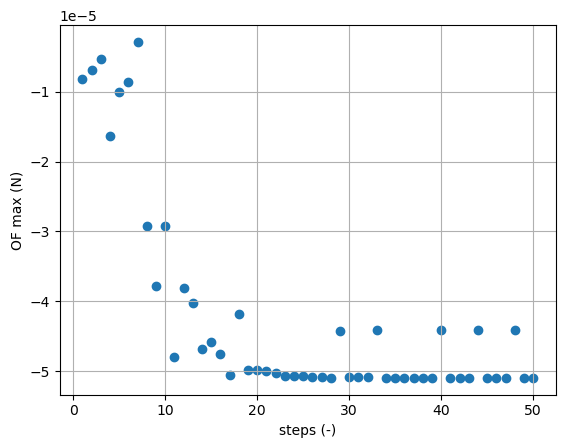

In [5]:
n = pl.linspace(1, len(of_max), len(of_max))

pl.scatter(n, of_max)
pl.xlabel("steps (-)")
pl.ylabel("OF max (N)")
pl.grid(True)